In [1]:
from pathlib import Path

import numpy as np

import matplotlib.pyplot as plt
import seaborn

import ard
import moorpy

plt.style.use(
    [
        "dark_background",
        "https://raw.githubusercontent.com/cfrontin/tools_cvf/refs/heads/main/tools_cvf/stylesheet_cvf.mplstyle",
        "https://raw.githubusercontent.com/cfrontin/tools_cvf/refs/heads/main/tools_cvf/stylesheet_nrel.mplstyle",
    ]
)

'pyomo.contrib.solver.common.base'. Please update your import. (deprecated in
6.9.2) (called from /Users/cfrontin/miniforge3/envs/ard-dev-
env/lib/python3.12/site-packages/optiwindnet/MILP/pyomo.py:10)


In [2]:
path_bathy = (
    Path(ard.__file__).parent.parent
    / "examples"
    / "data"
    / "GulfOfMaine_bathymetry_100x99.txt"
)
bgd = ard.geographic.BathymetryGridData()
bgd.load_moorpy_bathymetry(path_bathy)

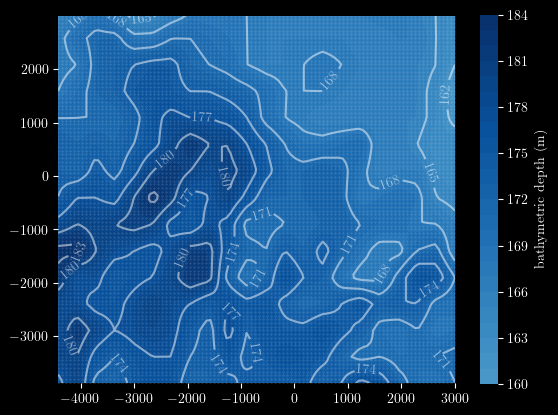

In [3]:
fig, ax = plt.subplots()
cs0 = ax.contourf(
    bgd.x_data,
    bgd.y_data,
    bgd.z_data,
    levels=25,
    cmap="Blues",
    vmin=125.0,
)
ax.scatter(
    bgd.x_data.flat,
    bgd.y_data.flat,
    s=0.1,
    c="w",
    alpha=0.25,
)
cs1 = ax.contour(
    bgd.x_data,
    bgd.y_data,
    bgd.z_data,
    levels=7,
    colors="w",
    alpha=0.5,
)
ax.clabel(cs1)
ax.set_aspect("equal")
cb0 = fig.colorbar(cs0)
cb0.outline.set_visible(False)
cb0.set_label("bathymetric depth (m)")

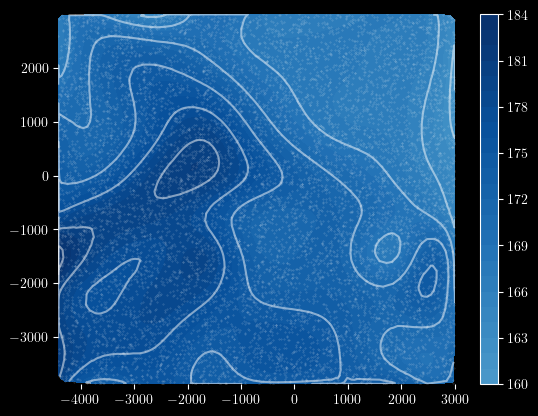

In [4]:
fig, ax = plt.subplots()
x_query = np.random.uniform(bgd.x_data.min(), bgd.x_data.max(), size=10000)
y_query = np.random.uniform(bgd.y_data.min(), bgd.y_data.max(), size=10000)
cs0 = ax.tricontourf(
    x_query,
    y_query,
    bgd.evaluate(x_query, y_query),
    levels=25,
    cmap="Blues",
    vmin=125.0,
)
ax.scatter(
    x_query,
    y_query,
    s=0.1,
    c="w",
    alpha=0.25,
)
cs1 = ax.tricontour(
    x_query,
    y_query,
    bgd.evaluate(x_query, y_query),
    levels=7,
    colors="w",
    alpha=0.5,
)
fig.colorbar(cs0)